In [1]:
# importing relevant libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [2]:
# importing the data
df = pd.read_excel('../data/Online Retail.xlsx')
df.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Checking the null value records
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


- For Market Basket Analysis,we want the items that were purchased in a each transaction,since we don't care about customer level MBA as of now,we will keep those rows where 'Customer ID' is missing 
- Also we will need to remove transactions with any null "Description" values,cause the product description is very important in MBA .
- Another thing,the dataset [description](https://archive.ics.uci.edu/dataset/352/online+retail) mentions that 'InvoiceNo' is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.  So we need to also remove such transactions. We also need to make sure there aren't any whitespaces at the start and end of these description,otherwise '   ABC' and 'ABC' will be treated as separately.

In [5]:
# checking for cancelled transactions
df[df['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [6]:
# Dropping records with Null 'Description'
df1 = df.dropna(subset=['Description'])
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [7]:
# Dropping records with cancelled orders
df1 = df1[~df1['InvoiceNo'].astype(str).str.contains('C')]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531167 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531167 non-null  object        
 1   StockCode    531167 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     531167 non-null  int64         
 4   InvoiceDate  531167 non-null  datetime64[ns]
 5   UnitPrice    531167 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531167 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [8]:
# making checks
print('Original dataframe shape:',df.shape)
print('New dataframe shape:', df1.shape )
print('Cancelled records:')
df1[df1['InvoiceNo'].astype(str).str.contains('C')]

Original dataframe shape: (541909, 8)
New dataframe shape: (531167, 8)
Cancelled records:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [9]:
df1 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
# removing the whitepaces in description
df1['Description'] = df1['Description'].astype(str).str.strip()

- I saw above,that some numeric columns like "Quantity" had negative values(when checking cancelled orders), but check it neverthless for all numeric columns.
- Also, there seem to be some transactions where 'StockCode' isn't a a 5-digit integral number. Let us just see that too. 

In [11]:
df1[(df1['Quantity'] <= 0)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,NaN,United Kingdom
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


So quantity = 0 is likely an error, quantity < 0 implies returned order , for eg : someone bought 5 items but returned 2. But we will remove every record with quantity <= 0, cause evern the negative values don't tell anything about buying intent. 

In [12]:
# dropping these records
df1 = df1[~(df1['Quantity'] <= 0)]
df1[(df1['Quantity'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [13]:
df1[(df1['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [16]:
df1[df1['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,2010-12-03 12:08:00,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
14335,537534,85064,CREAM SWEETHEART LETTER RACK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
14336,537534,84832,ZINC WILLIE WINKIE CANDLE STICK,1,2010-12-07 11:48:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524622,580609,22927,Amazon,1,2011-12-05 11:41:00,0.0,NaN,United Kingdom
535325,581202,23404,check,41,2011-12-07 18:30:00,0.0,NaN,United Kingdom
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom


- So negative unit values looks like financial adjustments,nothing to do with buying ,so we'll drop them.
- For UnitPrice = 0,we got both genuine looking description and some financial adjustments. Former can be related to free samples et al, so all these doesn't relate to MBA and hence will be dropped.

In [17]:
df1 = df1[df1['UnitPrice'] > 0]
df1.shape

(530104, 8)

In [18]:
# Just some last checks
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [23]:
df1[~ df1['InvoiceNo'].astype(str).str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [28]:
df1[~ df1['StockCode'].astype(str).str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


- We will remove the "Adjust bad debt".
- We will also remove the "Description" = "POSTAGE". POST or POSTAGE refers to the cost of delivery for the customer's order. It appears as a line item in the invoice with a positive quantity and price, contributing to the total invoice amount. It’s not a product; not meaningful for basket patterns.
- All other StockCode looks genuine even though they aren't numeric,we will keep them for now.

In [29]:
# only numeric InvoiceNo
df1 = df1[df1['InvoiceNo'].astype(str).str.isnumeric()]

# removing StockCode = "POST"
df1 = df1[df1['StockCode'] != 'POST']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528977 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528977 non-null  object        
 1   StockCode    528977 non-null  object        
 2   Description  528977 non-null  object        
 3   Quantity     528977 non-null  int64         
 4   InvoiceDate  528977 non-null  datetime64[ns]
 5   UnitPrice    528977 non-null  float64       
 6   CustomerID   396785 non-null  float64       
 7   Country      528977 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.3+ MB


Almost 530K records are a lot to analyse, so let us see what is the number of transactions per country and make some sense of it. Keep it mind that a customer can buy multiple products at a time,each one of them will be recordd separately in the dataset but their invoice no. will be same and they will be counted as one transaction.

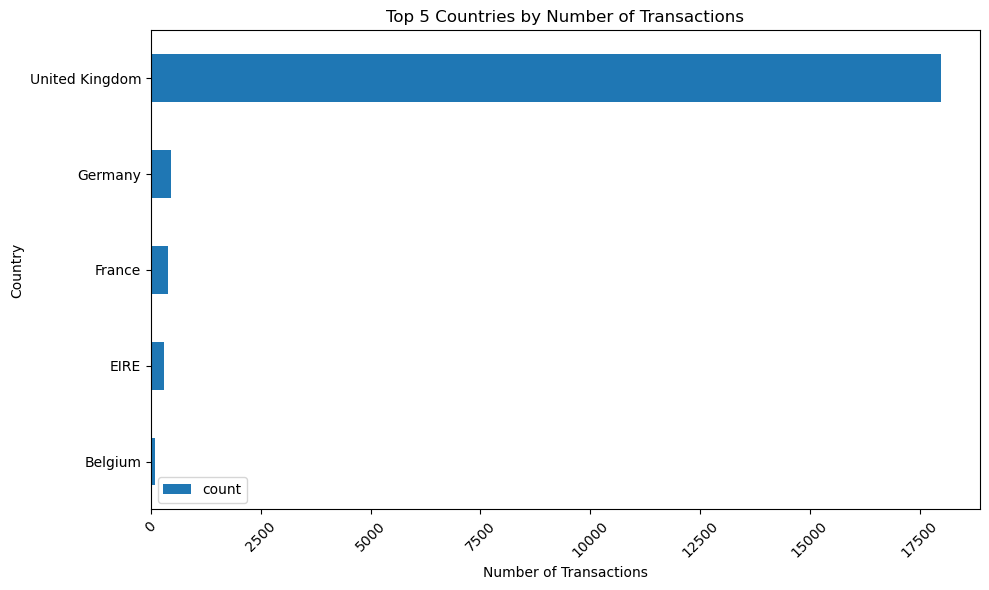

In [42]:
invoice_country = df1[['InvoiceNo','Country']].drop_duplicates()                          # unique invoices
transactions_by_country = pd.DataFrame(invoice_country['Country'].value_counts().head(5)) # top 5 countries

transactions_by_country.plot(kind='barh',figsize=(10,6))                                   # horizontal bar plot
plt.title('Top 5 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

So as we can see UK dominates the dataset disproportionlly, so let us start with Germany for easiness.

In [44]:
germany_df = df1[df1['Country'] == 'Germany']
germany_df = germany_df.drop(columns=['Country'])
germany_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8666 entries, 1109 to 541805
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8666 non-null   object        
 1   StockCode    8666 non-null   object        
 2   Description  8666 non-null   object        
 3   Quantity     8666 non-null   int64         
 4   InvoiceDate  8666 non-null   datetime64[ns]
 5   UnitPrice    8666 non-null   float64       
 6   CustomerID   8666 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 541.6+ KB


In [45]:
print('Unique number of Products:', germany_df['Description'].nunique())

Unique number of Products: 1693


Even for such a small dataset, the unique items are about 1700. <br>
Now,we will create a basket i.e. what were the items(a list) present in each transaction.

In [49]:
# Group by InvoiceNo and aggregate product Description into list to create a basket
mybasket = germany_df.groupby('InvoiceNo')['Description'].apply(list)
mybasket.head(5)

InvoiceNo
536527    [SET OF 6 T-LIGHTS SANTA, ROTATING SILVER ANGE...
536840    [JAM MAKING SET PRINTED, JAM JAR WITH PINK LID...
536861    [FELTCRAFT 6 FLOWER FRIENDS, 6 RIBBONS RUSTIC ...
536967                            [JUMBO BAG RED RETROSPOT]
536983    [WOODLAND PARTY BAG + STICKER SET, HAND WARMER...
Name: Description, dtype: object

- **TransactionEncoder()** will be used to convert this basket into an array, this is very similar to one-hot encoding.
- We need to do this because the "apriori" algorithm accepts the input in this form only.
- Then we will get the most frequentist itemsets as an output of the algorithm. 
- We need to set a **minimum support threshold**, which we will keep at min_support = 0.025 (2.5%) for now.

In [51]:
te = TransactionEncoder() # defining the encoder object
te_array = te.fit(mybasket).transform(mybasket)
basket_df = pd.DataFrame(te_array,columns = te.columns_ , index=mybasket.index)
basket_df.head(5)

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536983,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
# Apply Apriori algorithm to find out the most frequent itemsets
frequent_itemsets = apriori(basket_df,min_support = 0.025,use_colnames= True) # atleast 2.5 percent appearances

In [75]:
frequent_itemsets.shape

(332, 2)

In [76]:
frequent_itemsets_top_20 = frequent_itemsets.sort_values('support',ascending=False).head(20)
frequent_itemsets_top_20

,support,itemsets
130,0.249443,(ROUND SNACK BOXES SET OF4 WOODLAND)
128,0.160356,(ROUND SNACK BOXES SET OF 4 FRUITS)
99,0.140312,(PLASTERS IN TIN WOODLAND ANIMALS)
121,0.140312,(REGENCY CAKESTAND 3 TIER)
293,0.133630,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
186,0.129176,(WOODLAND CHARLOTTE BAG)
96,0.118040,(PLASTERS IN TIN CIRCUS PARADE)
97,0.109131,(PLASTERS IN TIN SPACEBOY)
4,0.104677,(6 RIBBONS RUSTIC CHARM)
167,0.104677,(SPACEBOY LUNCH BOX)


In [77]:
frequent_itemsets_top_20.loc[293]['itemsets']

frozenset({'ROUND SNACK BOXES SET OF 4 FRUITS',
           'ROUND SNACK BOXES SET OF4 WOODLAND'})

In [78]:
frequent_itemsets_top_20.loc[268]['itemsets']

frozenset({'PLASTERS IN TIN WOODLAND ANIMALS',
           'ROUND SNACK BOXES SET OF4 WOODLAND'})

- So we can see that, in the top 20 most frequently bought itemsets, we got only two itemsets which has more than one item.
- No itemsets with three or more items were in the top 20.
- So let us look at the top pairs and top triplets.

In [79]:
top_pairs = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2)].sort_values('support',ascending=False)
top_pairs

,support,itemsets
293,0.133630,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
268,0.075724,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ..."
301,0.071269,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4..."
251,0.069042,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI..."
305,0.064588,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET..."
...,...,...
199,0.026726,"(PINK POLKADOT CUP, BLUE POLKADOT CUP)"
286,0.026726,"(STRAWBERRY LUNCH BOX WITH CUTLERY, RED TOADST..."
228,0.026726,"(JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND A..."
289,0.026726,"(SET OF 3 REGENCY CAKE TINS, REGENCY CAKESTAND..."


In [80]:
top_triplets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == 3)].sort_values('support',ascending=False)
top_triplets

,support,itemsets
324,0.042316,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
326,0.042316,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
323,0.040089,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ..."
330,0.040089,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET..."
328,0.037862,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF ..."
321,0.035635,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR..."
325,0.035635,"(PLASTERS IN TIN SPACEBOY, ROUND SNACK BOXES S..."
317,0.031180,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
327,0.031180,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET..."
320,0.028953,"(LUNCH BOX WITH CUTLERY RETROSPOT, ROUND SNACK..."


In [86]:
# top 20 pairs
top_20_pairs = top_pairs.head(20).copy()

# creating a modified dataframe
top_20_pairs['Item1'] = top_20_pairs['itemsets'].apply(lambda x: list(x)[0])
top_20_pairs['Item2'] = top_20_pairs['itemsets'].apply(lambda x: list(x)[1])
top_20_pairs

,support,itemsets,Item1,Item2
293,0.133630,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC...",ROUND SNACK BOXES SET OF 4 FRUITS,ROUND SNACK BOXES SET OF4 WOODLAND
268,0.075724,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",ROUND SNACK BOXES SET OF4 WOODLAND,PLASTERS IN TIN WOODLAND ANIMALS
301,0.071269,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4...",SPACEBOY LUNCH BOX,ROUND SNACK BOXES SET OF4 WOODLAND
251,0.069042,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...",PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN WOODLAND ANIMALS
305,0.064588,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET...",WOODLAND CHARLOTTE BAG,ROUND SNACK BOXES SET OF4 WOODLAND
257,0.062361,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...",PLASTERS IN TIN SPACEBOY,PLASTERS IN TIN WOODLAND ANIMALS
274,0.060134,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...",WOODLAND CHARLOTTE BAG,RED RETROSPOT CHARLOTTE BAG
255,0.057906,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...",ROUND SNACK BOXES SET OF4 WOODLAND,PLASTERS IN TIN CIRCUS PARADE
254,0.051225,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I...",ROUND SNACK BOXES SET OF 4 FRUITS,PLASTERS IN TIN CIRCUS PARADE
229,0.048998,"(JUMBO BAG WOODLAND ANIMALS, JUMBO BAG RED RET...",JUMBO BAG WOODLAND ANIMALS,JUMBO BAG RED RETROSPOT


In [87]:
heatmap_pair_data = pd.crosstab(
    top_20_pairs['Item1'],
    top_20_pairs['Item2'],
    values = top_20_pairs['support'],
    aggfunc='mean',dropna = True)

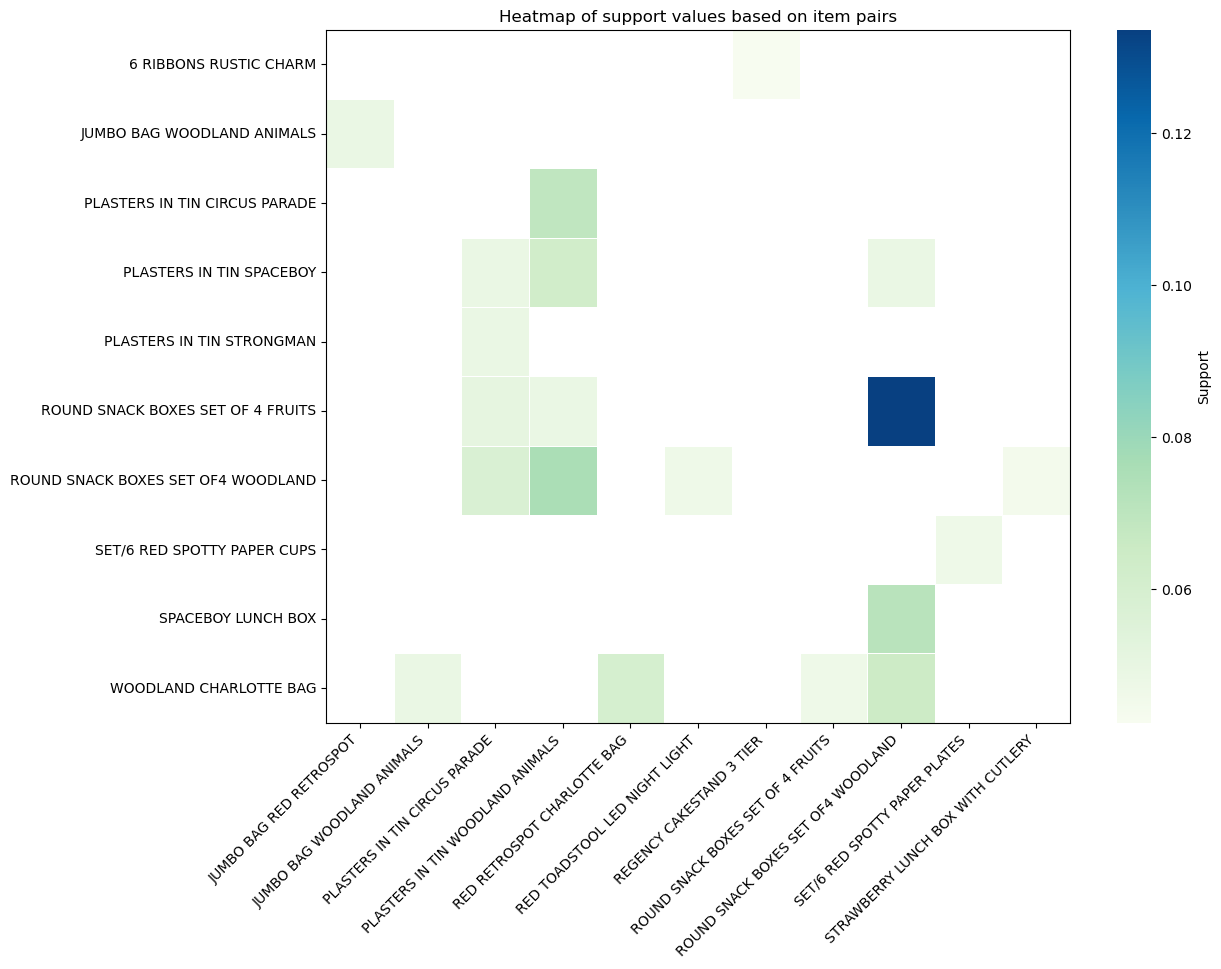

In [ ]:
# plotting the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(heatmap_pair_data,cmap = 'GnBu',annot = False,fmt = '.1f',cbar_kws = {'label':'Support'},linewidths = 0.5)
plt.title('Heatmap of support values based on item pairs')
plt.xticks(rotation = 45,ha = 'right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [95]:
# Get top 10 2-item frequent itemsets sorted by support in a horizontal bar plot
top_10_pairs = top_pairs.head(10).copy()

In [101]:
top_10_pairs 

,support,itemsets
293,0.133630,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNAC..."
268,0.075724,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ..."
301,0.071269,"(SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4..."
251,0.069042,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI..."
305,0.064588,"(WOODLAND CHARLOTTE BAG, ROUND SNACK BOXES SET..."
257,0.062361,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO..."
274,0.060134,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT..."
255,0.057906,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ..."
254,0.051225,"(ROUND SNACK BOXES SET OF 4 FRUITS, PLASTERS I..."
229,0.048998,"(JUMBO BAG WOODLAND ANIMALS, JUMBO BAG RED RET..."


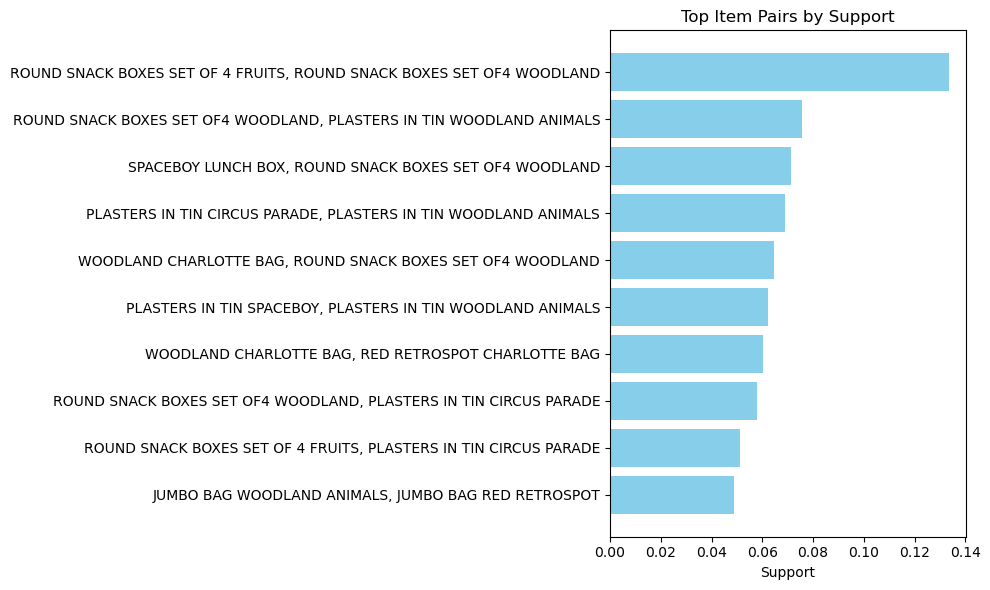

In [102]:
import matplotlib.pyplot as plt

# Create a copy of your DataFrame (assuming it's named 'top_pairs')
bar_data = top_10_pairs[['itemsets', 'support']].copy()

# Convert frozensets/itemsets to readable strings
bar_data['itemsets'] = bar_data['itemsets'].apply(lambda x: ', '.join(list(x)))

# Sort by support descending
bar_data = bar_data.sort_values(by='support', ascending=True)  # ascending=True for horizontal bars top-down

# Plot
plt.figure(figsize=(10, 6))
plt.barh(bar_data['itemsets'], bar_data['support'], color='skyblue')
plt.xlabel('Support')
plt.title('Top Item Pairs by Support')
plt.tight_layout()
plt.show()
